In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Notebook created to read and plot the output file from the ISEG SNMP Control Software. It could varie according to the file. (The software seems to be writting the file a little funny). This one works for the turning on of Channel 6. Written by Sergio Daniel Hernandez Charpak

I'm going to read the file and procees it in order to poopulate numpy arrays.

In [2]:
lines = tuple(open('measurment_channel_6.csv', 'r'))
counter=0
voltages=zeros((514))
voltageMesured=""
currents=zeros((514))
currentMesured=""
temperatures=zeros((514))
temperatureMesured=""
times=zeros((514))
for line in lines:
    line = line.replace('\n', '')
    strings=line.split(";")
    if(strings[3].startswith( 'Vmeasure' )):
        voltageMesured=strings[3]
        currentMesured=strings[4]
        temperatureMesured=strings[5].replace(',','')
    else:
        voltages[counter]=float(strings[3].replace(',',''))
        currents[counter]=float(strings[4])
        temperatures[counter]=float(strings[5].replace(',',''))
        time=strings[1].split(":")
        times[counter]=float(time[1])*60.0+float(time[2])
        counter+=1

Now I want to take the time from the start of the mesurement.

In [3]:
#Getting the time (ms) from the start of the mesurement
firstTime=times[0]
timesFromStart=times-firstTime
#The current in microamps
microcurrents=currents*1000000

This is for plotting in matplotlib

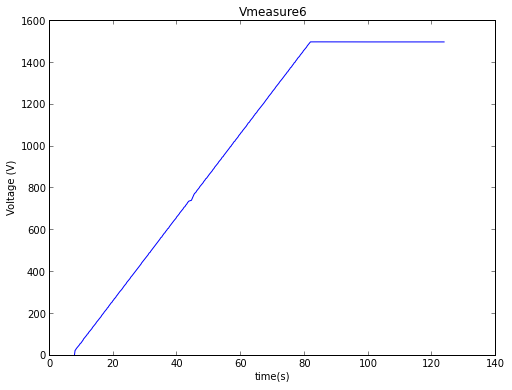

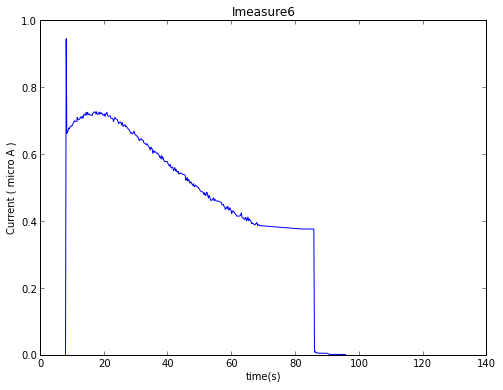

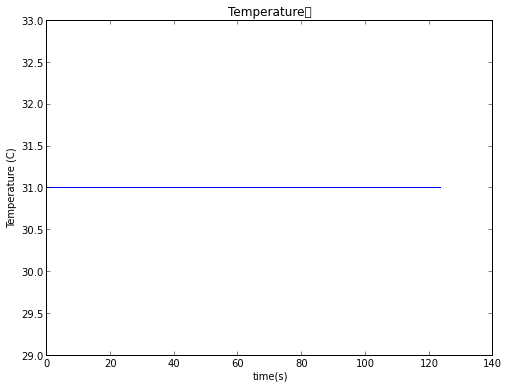

In [4]:
figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot(timesFromStart,voltages)
title(voltageMesured)
xlabel("time(s)")
ylabel("Voltage (V)")
figure(num=2, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot(timesFromStart,microcurrents)
xlabel("time(s)")
ylabel("Current ( micro A )")
title(currentMesured)
figure(num=3, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot(timesFromStart,temperatures)
title(temperatureMesured)
xlabel("time(s)")
ylabel("Temperature (C)")

Now I'll follow the next example to learn some pyroot:  <a href="https://github.com/demattia/usercode/blob/master/Tutorials/InteractiveAnalysis/Notebooks/HATS_2013/Pyroot%20Basics.ipynb">Pyroot Basics</a> 

In [5]:
#Now let's use ROOT
import ROOT
from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
import rootnotes
import rootprint
import utils

This would be for plotting the histograms

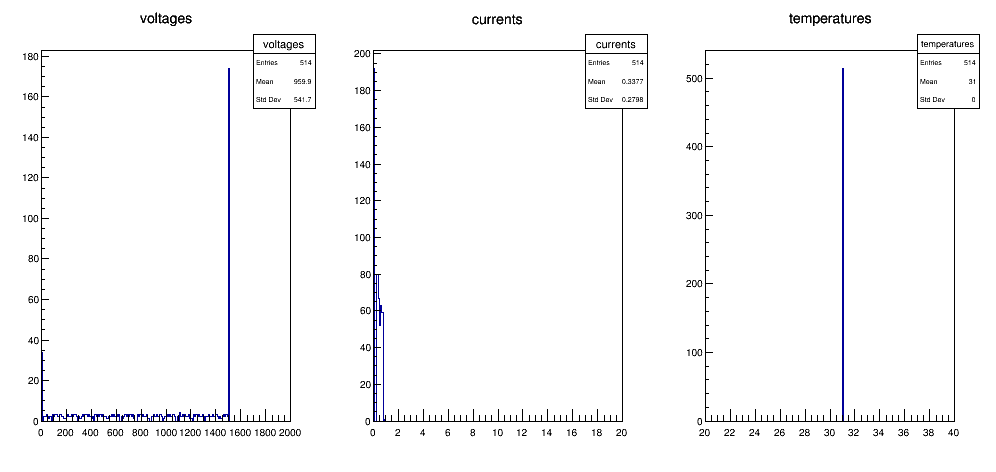

In [6]:
gROOT.Reset()
# This is what you would normally do in pyroot
# c1 = TCanvas( 'c1', 'Example with Formula', 200, 10, 700, 500 )
# This is to draw the canvas embedded in the notebook
c1 = rootnotes.canvas("Histograms for Channel 6", (1000, 500))
#c1.SetGridx() #For the grid
#c1.SetGridy()
#f = TFile("channel_6.root", "recreate") #To write in a .root file
h_volt = TH1F("voltages", "voltages", 200, 0, 2000)
h_curr = TH1F("currents", "currents", 200, 0, 20)
h_temp = TH1F("temperatures", "temperatures", 200,20, 40)
for i in range(len(voltages)):
    h_volt.Fill(voltages[i])
    h_curr.Fill(microcurrents[i])
    h_temp.Fill(temperatures[i])
# write the tree into the output file and close the file
c1.Divide(3)
c1.cd(1)
h_volt.Draw()
c1.cd(2)
h_curr.Draw()
c1.cd(3)
h_temp.Draw()
c1
#f.Write()
#f.Close()

And finally this would be for plotting the data vs time

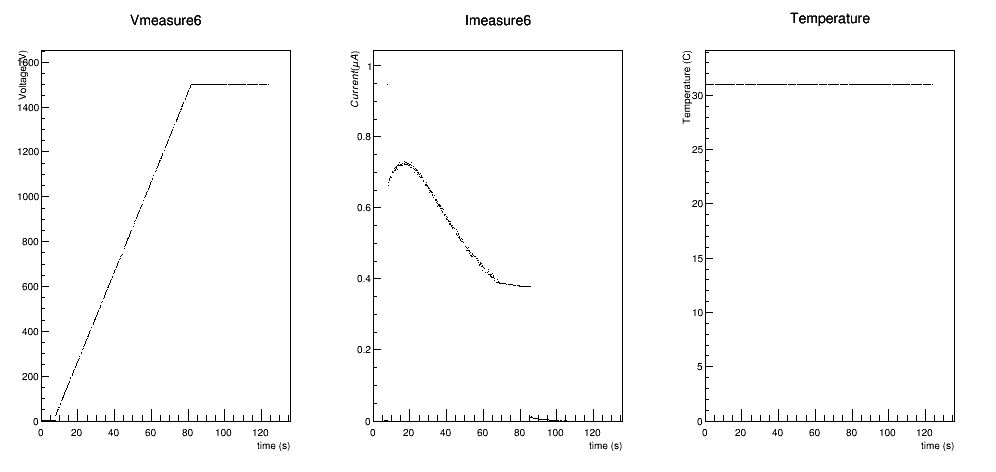

In [7]:
from array import array
import math

nBins = 550

graphCanvas = rootnotes.canvas("Voltage, Current and Temperature from Channel 6", (1000, 500))
# The lists must be converted to C arrays
g_v = ROOT.TGraph(nBins, array('d',timesFromStart ), array('d', voltages))
g_c = ROOT.TGraph(nBins, array('d',timesFromStart ), array('d', microcurrents))
g_t = ROOT.TGraph(nBins, array('d',timesFromStart ), array('d', temperatures))
# "A" option is required because the TGraph will not create the TAxis by default
ROOT.gStyle.SetMarkerStyle(8)
ROOT.gStyle.SetMarkerSize(2)
graphCanvas.Divide(3)
graphCanvas.cd(1)
g_v.Draw("AP")
g_v.SetTitle(voltageMesured)
g_v.GetXaxis().SetTitle("time (s)")
g_v.GetYaxis().SetTitle("Voltage (V)")
graphCanvas.cd(2)
g_c.Draw("AP")
g_c.SetTitle(currentMesured)
g_c.GetXaxis().SetTitle("time (s)")
g_c.GetYaxis().SetTitle("Current ( \mu A)")
graphCanvas.cd(3)
g_t.Draw("AP")
g_t.SetTitle(temperatureMesured)
g_t.GetXaxis().SetTitle("time (s)")
g_t.GetYaxis().SetTitle("Temperature (C)")
graphCanvas